# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [26]:
import pandas as pd
import re
import nltk
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [27]:
# Memuat dataset
df = pd.read_csv('../spam_email_dataset_raw.csv')

# Menampilkan informasi dasar
print(f"Dataset Shape: {df.shape}")
display(df.head())
df.info()

Dataset Shape: (5796, 3)


,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== EDA untuk Dataset Spam Email ===

Jumlah baris dan kolom: (5796, 3)

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB

Statistik Deskriptif (kolom numerik):
          CATEGORY
count  5796.000000
mean      0.327122
std       0.469203
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Statistik Deskriptif (kolom object):
                                                  MESSAGE  \
count                                                5796   
unique                                               5625   
top     \n\nHello I am your hot lil horny toy.\n\n    ...   
freq                                                    7   

    

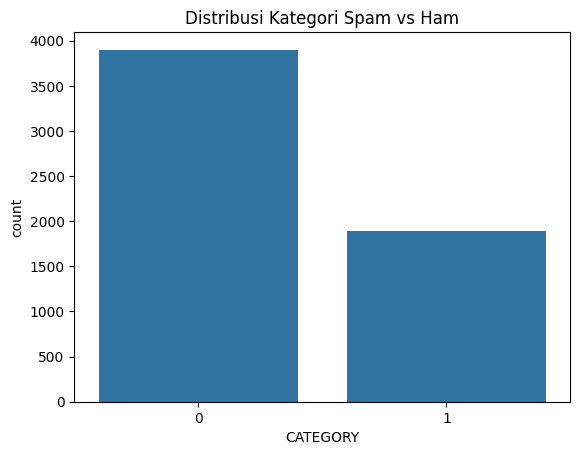


Cek nilai null:
CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

Cek duplikasi:
0

Panjang pesan (jumlah karakter):
count      5796.000000
mean       2780.795204
std        6940.076914
min          36.000000
25%         664.750000
50%        1211.000000
75%        2505.250000
max      234358.000000
Name: message_length, dtype: float64


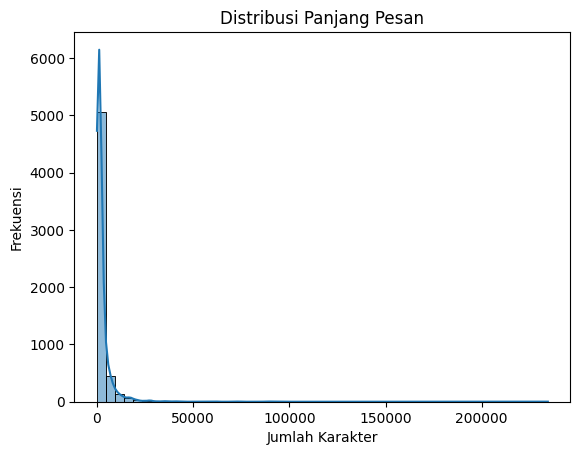

In [28]:
# EDA untuk dataset df (spam email)
print("=== EDA untuk Dataset Spam Email ===")
print("\nJumlah baris dan kolom:", df.shape)
print("\nInfo DataFrame:")
df.info()
print("\nStatistik Deskriptif (kolom numerik):")
print(df.describe())
print("\nStatistik Deskriptif (kolom object):")
print(df.describe(include='object'))

print("\nDistribusi Kategori (Spam/Ham):")
print(df['CATEGORY'].value_counts())
sns.countplot(x='CATEGORY', data=df)
plt.title('Distribusi Kategori Spam vs Ham')
plt.show()

print("\nCek nilai null:")
print(df.isnull().sum())

print("\nCek duplikasi:")
print(df.duplicated().sum())

print("\nPanjang pesan (jumlah karakter):")
df['message_length'] = df['MESSAGE'].apply(len)
print(df['message_length'].describe())
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Pesan')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [29]:
if 'FILE_NAME' in df.columns:
    df.drop(columns=['FILE_NAME'], inplace=True)

# Rename Kolom
df.rename(columns={'CATEGORY': 'label', 'MESSAGE': 'text'}, inplace=True)

# Mapping Label (0=ham, 1=spam)
df['label'] = pd.to_numeric(df['label'], errors='coerce')
df['label_str'] = df['label'].map({0: 'ham', 1: 'spam'})

print(f"Data Awal: {len(df)} baris")

Data Awal: 5796 baris


In [30]:
# Preprocessing NLP
def text_preprocessing(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)               # Hapus HTML
    text = re.sub(r'http\S+|www\S+', '', text)      # Hapus URL
    text = re.sub(r'\d+', '', text)                 # Hapus Angka
    text = re.sub(r'[^\w\s]', '', text)             # Hapus Simbol
    text = re.sub(r'\s+', ' ', text).strip()        # Hapus Spasi Ganda
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Filter stopwords & lemmatization
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(clean_tokens)

print("Sedang melakukan text preprocessing (Cleaning & Lemmatization)...")
df['clean_text'] = df['text'].apply(text_preprocessing)

Sedang melakukan text preprocessing (Cleaning & Lemmatization)...


In [31]:
# OPTIMASI DATA (Hapus Duplikasi & Kosong)
print("\n--- Memulai Optimasi Data ---")

# a. Hapus Duplikasi pada 'clean_text'
duplicates = df.duplicated(subset=['clean_text']).sum()
df.drop_duplicates(subset=['clean_text'], keep='first', inplace=True)
print(f"1. Menghapus {duplicates} data duplikat.")

# b. Hapus Data Kosong
df['clean_text'] = df['clean_text'].replace('', np.nan)
nan_count = df['clean_text'].isna().sum()
df.dropna(subset=['clean_text'], inplace=True)
print(f"2. Menghapus {nan_count} data yang kosong setelah cleaning.")

# c. Hapus Kolom 'text' Asli
if 'text' in df.columns:
    df.drop(columns=['text'], inplace=True)
    print("3. Kolom 'text' asli telah dihapus untuk efisiensi memori.")


--- Memulai Optimasi Data ---
1. Menghapus 357 data duplikat.
2. Menghapus 1 data yang kosong setelah cleaning.
3. Kolom 'text' asli telah dihapus untuk efisiensi memori.


In [32]:
print("\n" + "="*40)
print("HASIL AKHIR PREPROCESSING")
print("="*40)

# Menampilkan kolom yang tersisa
print(df.head()) 
print("-" * 40)
print(f"Total Data Bersih : {len(df)}")
print(f"Distribusi Label  :\n{df['label_str'].value_counts()}")

# Simpan
output_file = 'spam_email_dataset_cleaned.csv'
df.to_csv(output_file, index=False)
print(f"\nFile tersimpan: {output_file}")


HASIL AKHIR PREPROCESSING
   label  message_length label_str  \
0      1             612      spam   
1      1            1298      spam   
2      1            6691      spam   
3      1            1141      spam   
4      1            1795      spam   

                                          clean_text  
0  dear homeowner interest rate lowest point year...  
1  attention must computer user newspecial packag...  
2  multipart message mime format _nextpart__cdc_c...  
3  important information new domain name finally ...  
4  bottom line give away cd free people like one ...  
----------------------------------------
Total Data Bersih : 5438
Distribusi Label  :
label_str
ham     3830
spam    1608
Name: count, dtype: int64

File tersimpan: spam_email_dataset_cleaned.csv
